# Data Exploration/Cleaning for Predictive Maintenance
### Author: Cesar Castro M
### Date: 08/11/2025

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm

In [4]:
mfg_data = pd.read_csv('..\data\predictive_maintenance.csv')


Source: https://www.kaggle.com/datasets/shivamb/machine-predictive-maintenance-classification 

<br>
- UID: unique identifier ranging from 1 to 10000 </br>
- productID: consisting of a letter L, M, or H for low (50% of all products), medium (30%), and high (20%) as product quality variants and a variant-specific serial number</br>
- air temperature [K]: generated using a random walk process later normalized to a standard deviation of 2 K around 300 K</br>
- process temperature [K]: generated using a random walk process normalized to a standard deviation of 1 K, added to the air temperature plus 10 K.</br>
- rotational speed [rpm]: calculated from powepower of 2860 W, overlaid with a normally distributed noise</br>
- torque [Nm]: torque values are normally distributed around 40 Nm with an Ïƒ = 10 Nm and no negative values.</br>
- tool wear [min]: The quality variants H/M/L add 5/3/2 minutes of tool wear to the used tool in the process. and a
'machine failure' label that indicates, whether the machine has failed in this particular data point for any of the following failure modes are true.</br>

In [5]:
mfg_data.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [14]:
# Setting right feature type
mfg_data['UDI'] = mfg_data['UDI'].astype('object')


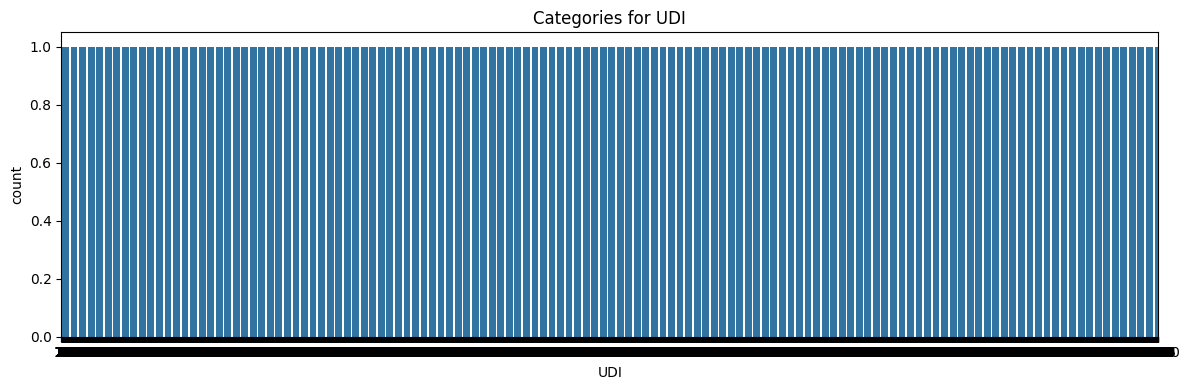

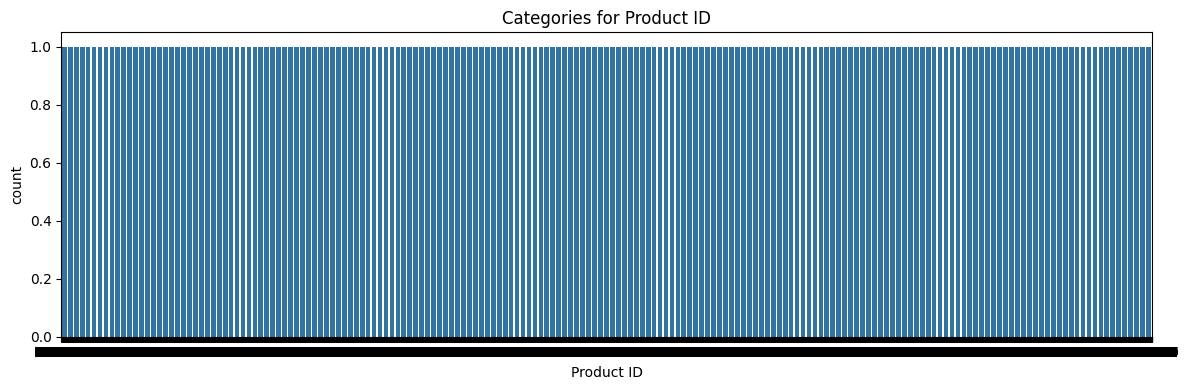

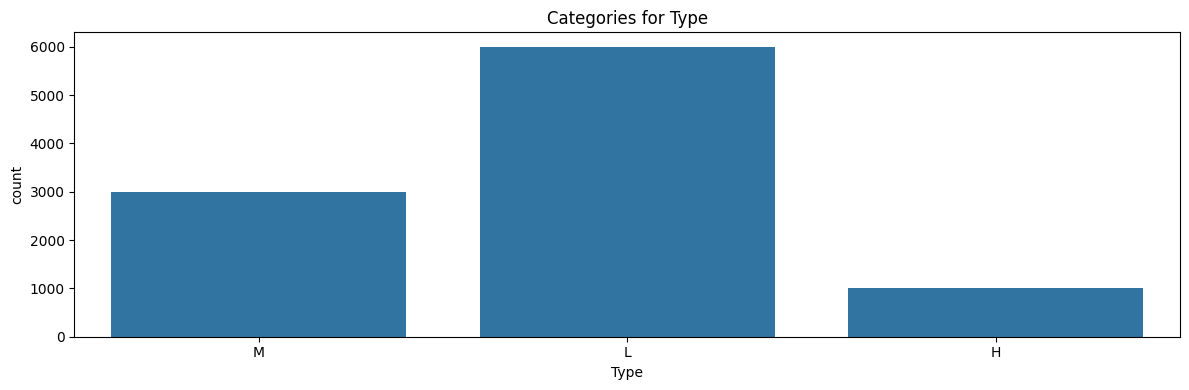

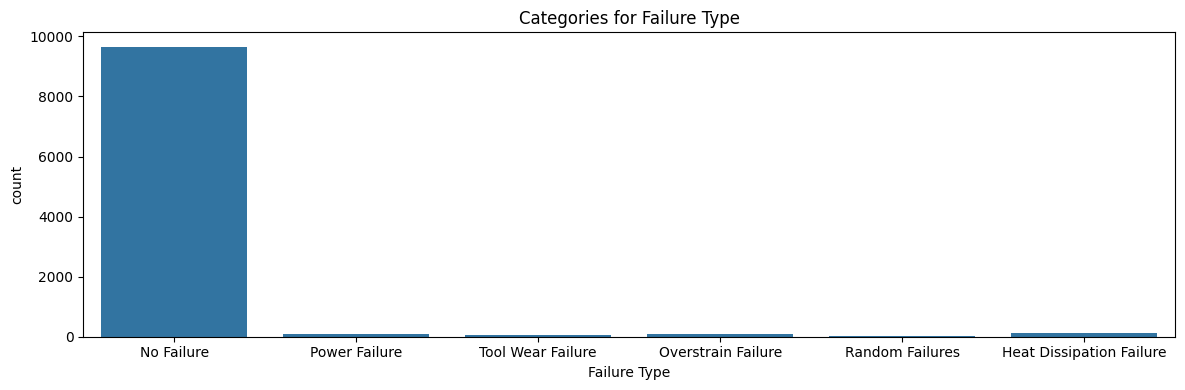

{'UDI': 10000, 'Product ID': 10000, 'Type': 3, 'Failure Type': 6}


In [10]:
#Find Categorical Features on childcare_costs dataset
def cat_features_explore(df):
    def calc_unique_counts(df,col_name):
        col = df[col_name]
        unique_val = col.unique()
        plt.figure(figsize=(12,4))
        sns.countplot(data=df, x=col_name)
        plt.title(f'Categories for {col_name}')
        plt.tight_layout()
        plt.show()
        return len(unique_val)

    cat_cols = mfg_data.select_dtypes(include="object").columns.to_list()
    count_dic = {col:calc_unique_counts(mfg_data,col) for col in cat_cols}
    print(count_dic)    
 
cat_features_explore(mfg_data)



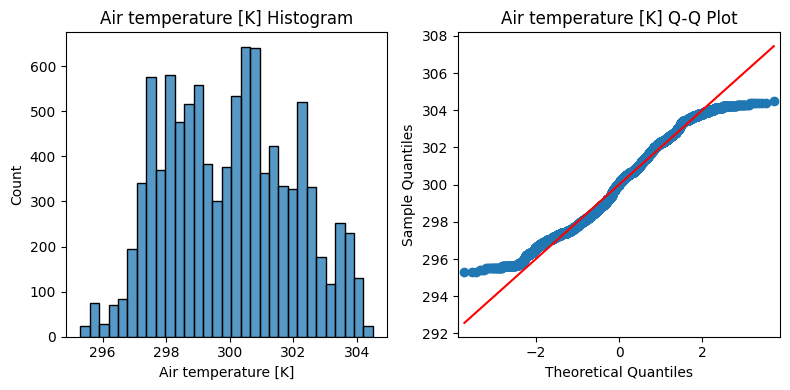

Air temperature [K] Mean: 300.00
Air temperature [K] Median: 300.10
Air temperature [K] Max: 304.50
Air temperature [K] Min: 295.30
Air temperature [K] Standard Deviation: 2.00
Air temperature [K] Number of Points: 10000


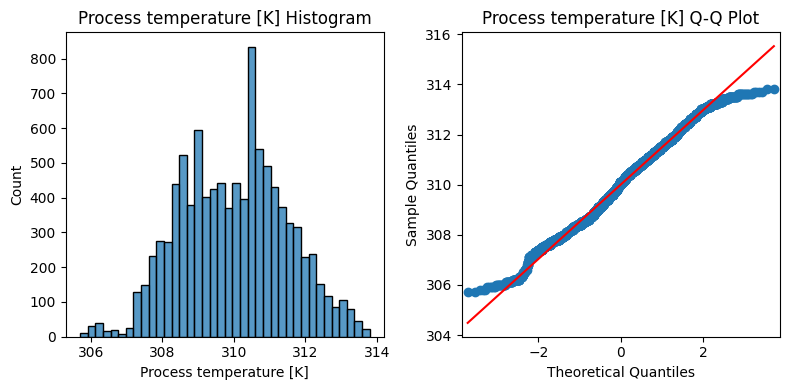

Process temperature [K] Mean: 310.01
Process temperature [K] Median: 310.10
Process temperature [K] Max: 313.80
Process temperature [K] Min: 305.70
Process temperature [K] Standard Deviation: 1.48
Process temperature [K] Number of Points: 10000


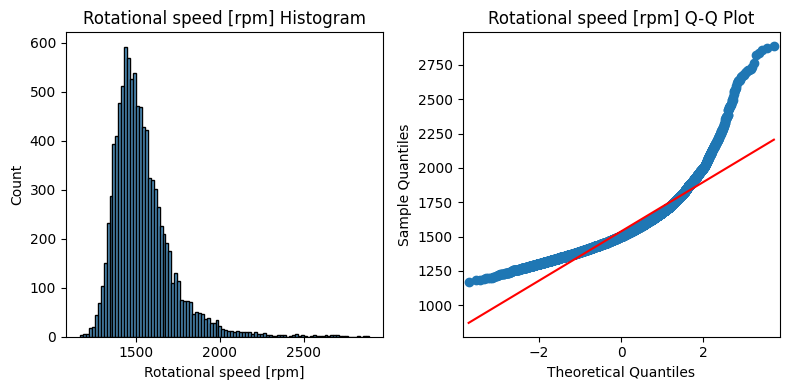

Rotational speed [rpm] Mean: 1538.78
Rotational speed [rpm] Median: 1503.00
Rotational speed [rpm] Max: 2886.00
Rotational speed [rpm] Min: 1168.00
Rotational speed [rpm] Standard Deviation: 179.28
Rotational speed [rpm] Number of Points: 10000


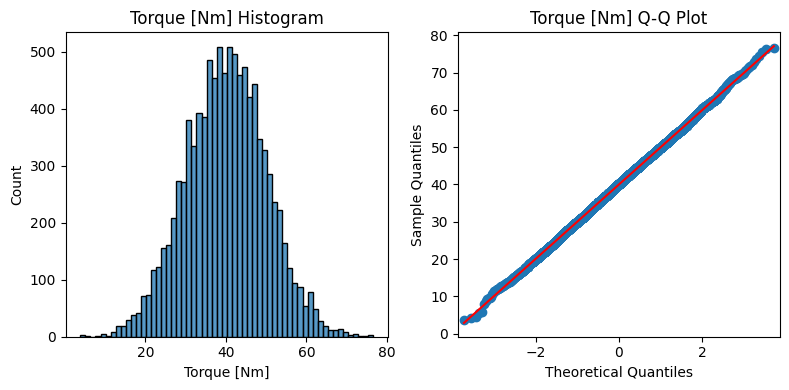

Torque [Nm] Mean: 39.99
Torque [Nm] Median: 40.10
Torque [Nm] Max: 76.60
Torque [Nm] Min: 3.80
Torque [Nm] Standard Deviation: 9.97
Torque [Nm] Number of Points: 10000


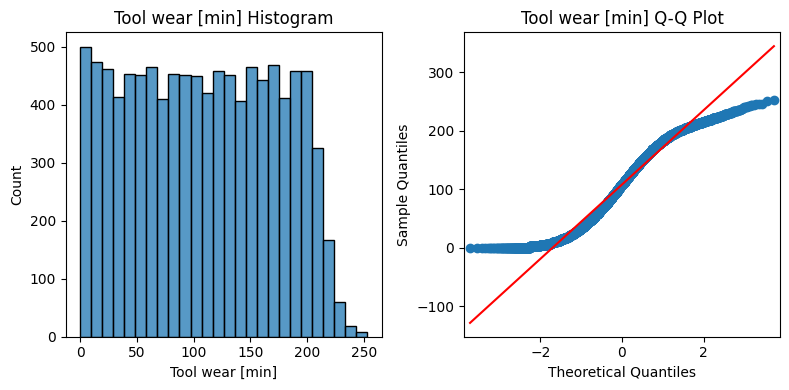

Tool wear [min] Mean: 107.95
Tool wear [min] Median: 108.00
Tool wear [min] Max: 253.00
Tool wear [min] Min: 0.00
Tool wear [min] Standard Deviation: 63.65
Tool wear [min] Number of Points: 10000


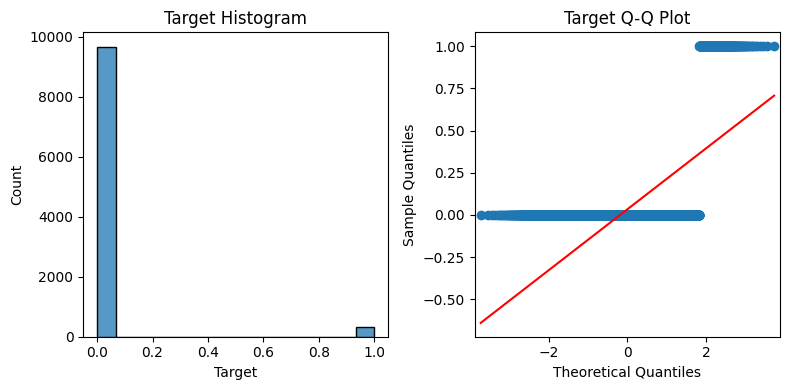

Target Mean: 0.03
Target Median: 0.00
Target Max: 1.00
Target Min: 0.00
Target Standard Deviation: 0.18
Target Number of Points: 10000


In [11]:
def plot_hist_qq(df,col_name):
    col = df[col_name]

    fig, (ax1, ax2) = plt.subplots(ncols=2,nrows=1,figsize=(8, 4))
    sns.histplot(col, linewidth=1,ax=ax1)
    #sns.kdeplot(col, linewidth=5,ax=ax1)
    ax1.set_title(col_name + ' Histogram')

    sm.qqplot(col,line='s',ax=ax2)
    ax2.set_title(col_name + ' Q-Q Plot')
    plt.tight_layout()
    plt.show()

def calculate_stats(df,col_name):
    print (f"{col_name} Mean: {df[col_name].mean():.2f}")
    print (f"{col_name} Median: {df[col_name].median():.2f}")
    print (f"{col_name} Max: {df[col_name].max():.2f}")
    print (f"{col_name} Min: {df[col_name].min():.2f}")
    print (f"{col_name} Standard Deviation: {df[col_name].std():.2f}")    
    print (f"{col_name} Number of Points: {len(df[col_name]):.0f}")    

for col in mfg_data.select_dtypes(include="number").columns.to_list():
    plot_hist_qq(mfg_data,col) 
    calculate_stats(mfg_data,col)

<Figure size 1000x600 with 0 Axes>

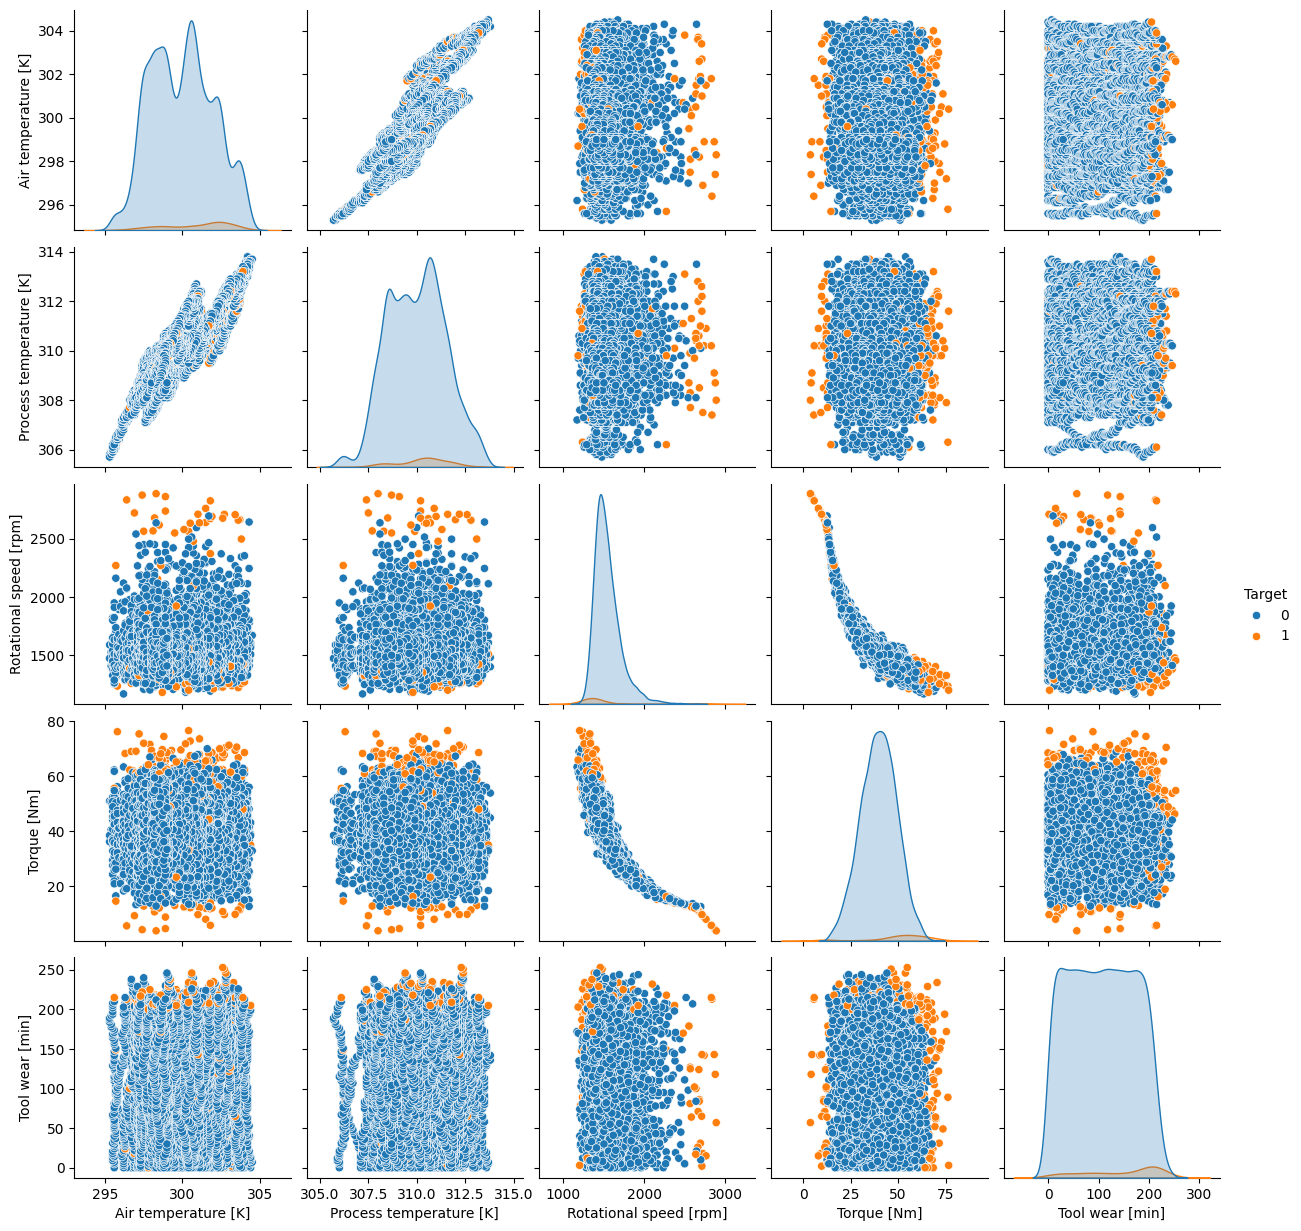

In [17]:
num_cols = mfg_data.select_dtypes(include="number").columns.to_list()
plot_df = mfg_data[num_cols]
plt.figure(figsize=(10,6))
sns.pairplot(plot_df, diag_kind='kde',hue='Target')
plt.show()

In [25]:
#Standardization
from sklearn.preprocessing import StandardScaler

mfg_data_scaled = mfg_data.copy().drop(columns=['Target'])

scaler = StandardScaler()
num_cols = mfg_data_scaled.select_dtypes(include="number").columns.to_list()

mfg_data_scaled[num_cols] = scaler.fit_transform(mfg_data_scaled[num_cols])
mfg_data_scaled['Target'] = mfg_data['Target']

<Figure size 1000x600 with 0 Axes>

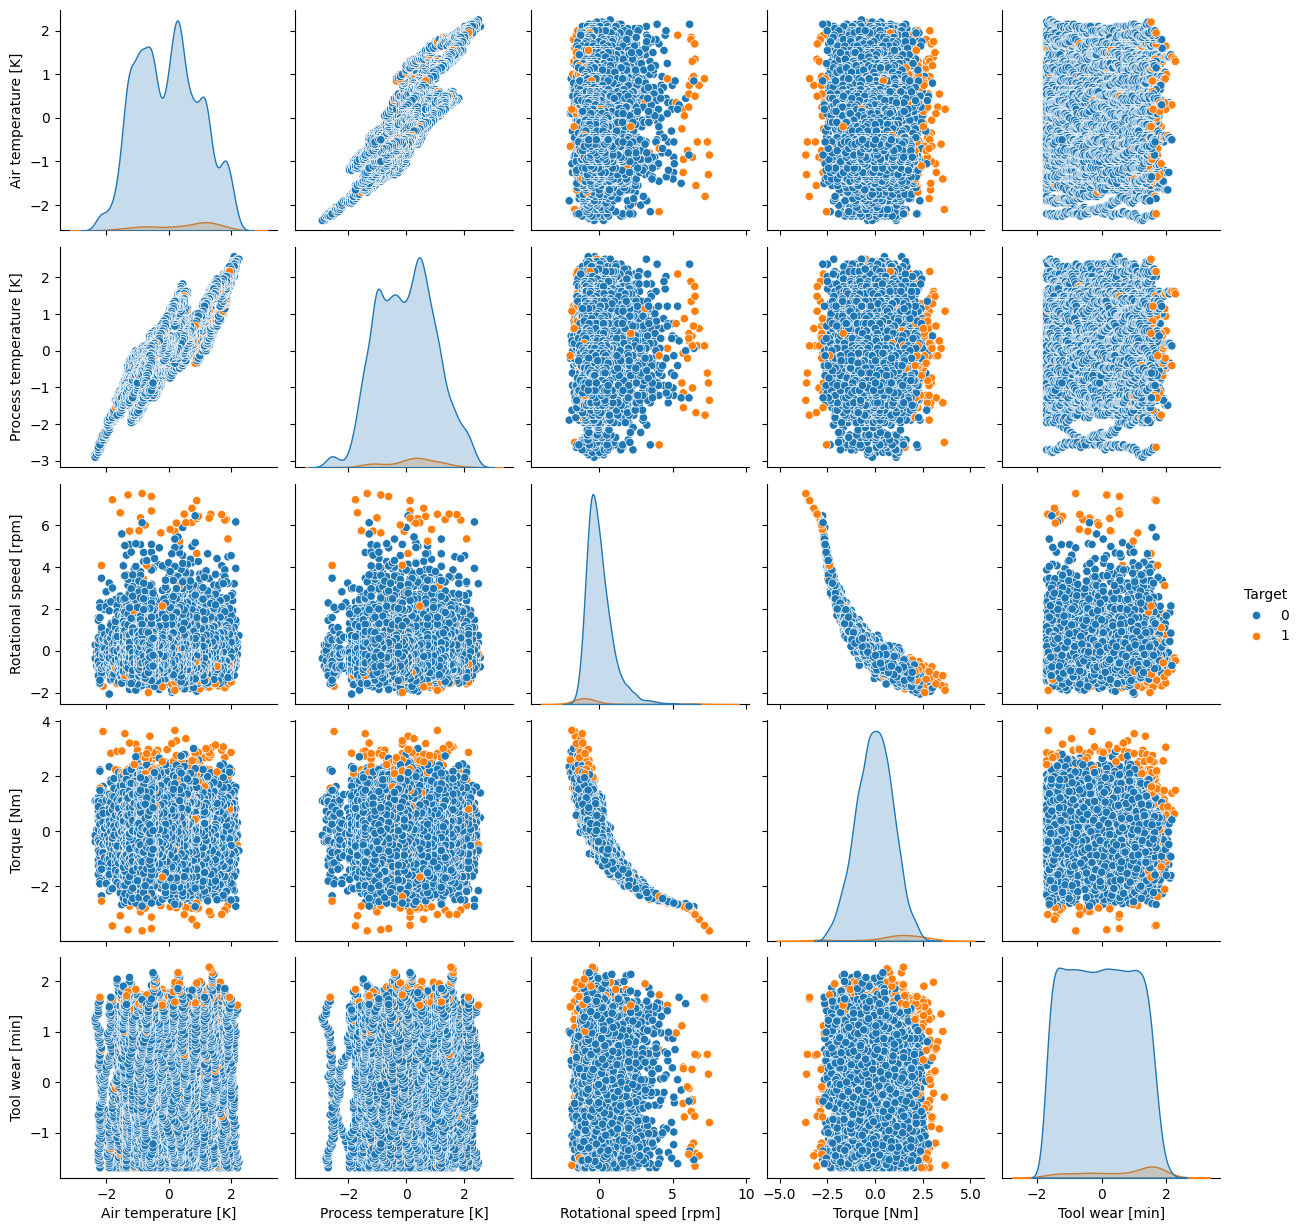

In [26]:
num_cols = mfg_data_scaled.select_dtypes(include="number").columns.to_list()
plot_df = mfg_data_scaled[num_cols]
plt.figure(figsize=(10,6))
sns.pairplot(plot_df, diag_kind='kde',hue='Target')
plt.show()

In [ ]:
dfsgsdf=Msdfsdfgdsfhgdsadfgasdfgsdfgsdfgsdfga_3 = mfg_data_scaled.copy()
mfg_data_3 = mfg_data_3.drop(columns=['UDI']) #High Cardinality
mfg_data_3 = mfg_data_3.drop(columns=['Product ID']) #High Cardinality

mfg_data_3.head()


,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Failure Type,Target
0,M,-0.952389,-0.947360,0.068185,0.282200,-1.695984,No Failure,0
1,L,-0.902393,-0.879959,-0.729472,0.633308,-1.648852,No Failure,0
2,L,-0.952389,-1.014761,-0.227450,0.944290,-1.617430,No Failure,0
3,L,-0.902393,-0.947360,-0.590021,-0.048845,-1.586009,No Failure,0
4,L,-0.902393,-0.879959,-0.729472,0.001313,-1.554588,No Failure,0


In [69]:
from sklearn.preprocessing import LabelEncoder

l_encoder = LabelEncoder()
mfg_data_3['FailureType_encoded'] = l_encoder.fit_transform(mfg_data_3['Failure Type'])
mfg_data_3.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Failure Type,Target,FailureType_encoded
0,M,-0.952389,-0.947360,0.068185,0.282200,-1.695984,No Failure,0,1
1,L,-0.902393,-0.879959,-0.729472,0.633308,-1.648852,No Failure,0,1
2,L,-0.952389,-1.014761,-0.227450,0.944290,-1.617430,No Failure,0,1
3,L,-0.902393,-0.947360,-0.590021,-0.048845,-1.586009,No Failure,0,1
4,L,-0.902393,-0.879959,-0.729472,0.001313,-1.554588,No Failure,0,1


In [70]:
enconder_mapping = dict(zip(l_encoder.classes_, range(len(l_encoder.classes_))))

print(enconder_mapping)


{'Heat Dissipation Failure': 0, 'No Failure': 1, 'Overstrain Failure': 2, 'Power Failure': 3, 'Random Failures': 4, 'Tool Wear Failure': 5}


In [72]:
mfg_data_3 = mfg_data_3.drop(columns=['Failure Type'])
mfg_data_3 = pd.get_dummies(mfg_data_3)
mfg_data_3.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,FailureType_encoded,Type_H,Type_L,Type_M
0,-0.952389,-0.947360,0.068185,0.282200,-1.695984,0,1,False,False,True
1,-0.902393,-0.879959,-0.729472,0.633308,-1.648852,0,1,False,True,False
2,-0.952389,-1.014761,-0.227450,0.944290,-1.617430,0,1,False,True,False
3,-0.902393,-0.947360,-0.590021,-0.048845,-1.586009,0,1,False,True,False
4,-0.902393,-0.879959,-0.729472,0.001313,-1.554588,0,1,False,True,False


In [73]:
mfg_data_3.to_csv('..\data\processed\predictive_maintenance_ready.csv',index=False)